<a href="https://colab.research.google.com/github/mromaoro/mba_fiap/blob/main/Cognitive_enviroment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bibliotecas

In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go

In [ ]:
"""
select * from bigquery-public-data.new_york_taxi_trips.tlc_yellow_trips_2011
union all
select * from bigquery-public-data.new_york_taxi_trips.tlc_yellow_trips_2012
union all
select * from bigquery-public-data.new_york_taxi_trips.tlc_yellow_trips_2013
union all
select * from bigquery-public-data.new_york_taxi_trips.tlc_yellow_trips_2014
union all
select * from bigquery-public-data.new_york_taxi_trips.tlc_yellow_trips_2015
union all
select * from bigquery-public-data.new_york_taxi_trips.tlc_yellow_trips_2016
union all
select * from bigquery-public-data.new_york_taxi_trips.tlc_yellow_trips_2017
union all
select * from bigquery-public-data.new_york_taxi_trips.tlc_yellow_trips_2018
union all
select * from bigquery-public-data.new_york_taxi_trips.tlc_yellow_trips_2019
union all
select * from bigquery-public-data.new_york_taxi_trips.tlc_yellow_trips_2020
union all
select * from bigquery-public-data.new_york_taxi_trips.tlc_yellow_trips_2021
"""

# Carregamento dos Dados

In [ ]:
enem_sample = pd.read_excel("https://storage.googleapis.com/cloud-based-analytics_public/BI-2022/enem_sample10k.xlsx")

In [ ]:
#Prévia
enem_sample

,HASHID,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,...,Q020,Q021,Q022,Q023,Q024,Q025,Q026,Q027,IN_TEMPO_ADICIONAL,TP_FAIXA_ETARIA
0,-9223324288874164224,200005774650,2020,NaN,NaN,NaN,NaN,NaN,F,1.0,...,A,A,C,A,A,B,NaN,NaN,NaN,2.0
1,-9222394707633524736,190001191389,2019,2111300.0,São Luís,21.0,MA,20.0,M,1.0,...,A,A,C,A,A,B,NaN,NaN,0.0,NaN
2,-9221987136575062016,190005258528,2019,2920502.0,Maracás,29.0,BA,16.0,F,1.0,...,B,B,D,A,B,B,NaN,NaN,0.0,NaN
3,-9221510098754490368,190005475774,2019,1200401.0,Rio Branco,12.0,AC,17.0,F,1.0,...,A,A,C,A,B,B,NaN,NaN,0.0,NaN
4,-9217552966517322752,200001883061,2020,NaN,NaN,NaN,NaN,NaN,F,1.0,...,A,A,D,B,C,B,NaN,NaN,NaN,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9908,9219979566933156864,200003052910,2020,NaN,NaN,NaN,NaN,NaN,F,1.0,...,A,B,C,A,A,B,NaN,NaN,NaN,4.0
9909,9220309518087209984,190005883974,2019,4111506.0,Ivaiporã,41.0,PR,17.0,F,1.0,...,B,B,C,A,A,B,NaN,NaN,0.0,NaN
9910,9221192176111847424,190001149943,2019,2304400.0,Fortaleza,23.0,CE,17.0,M,1.0,...,A,A,B,A,A,A,NaN,NaN,0.0,NaN
9911,9221475143219708928,190005110302,2019,1302603.0,Manaus,13.0,AM,19.0,F,0.0,...,A,B,C,A,A,B,NaN,NaN,0.0,NaN


# Questões

## Exercício 1
Qual a distribuição dos participantes por estado onde a prova foi realizada em cada ano e no total?

### Resposta total

In [ ]:
# Agrupa por UF e faz count de ID's
enem_sample_group = enem_sample.groupby(["SG_UF_PROVA"]).agg({'HASHID': 'count'}).reset_index()

# Calcula o percentual sobre o total e armazena em uma nova coluna HASHID_perc
enem_sample_group["HASHID_perc"] = enem_sample_group["HASHID"] / enem_sample_group["HASHID"].sum()

# Muda o formato da nova coluna HASHID_perc para ficar percentual
enem_sample_group["HASHID_perc"] = enem_sample_group["HASHID_perc"].map("{:.2%}".format)

#Exibe os resultados
display(enem_sample_group)

,SG_UF_PROVA,HASHID,HASHID_perc
0,AC,71,0.72%
1,AL,188,1.90%
2,AM,229,2.31%
3,AP,90,0.91%
4,BA,754,7.61%
5,CE,569,5.74%
6,DF,195,1.97%
7,ES,195,1.97%
8,GO,365,3.68%
9,MA,401,4.05%


In [ ]:
px.bar(enem_sample_group.sort_values("HASHID"),
       y = "HASHID",
       x = "SG_UF_PROVA",
       hover_data=["HASHID", "HASHID_perc"]
       )

In [ ]:
px.pie(enem_sample_group,
       values="HASHID",
       names="SG_UF_PROVA")

### Resposta por ano

In [ ]:
# Agrupa por UF e ano e faz count de ID's
enem_sample_group = enem_sample.groupby(["SG_UF_PROVA", "NU_ANO"]).agg({'HASHID': 'count'}).reset_index()
display(enem_sample_group)

# Agrupamento por ano
enem_sample_group_ano = enem_sample.groupby(["NU_ANO"]).agg({'HASHID': 'count'}).reset_index()
display(enem_sample_group_ano)

,SG_UF_PROVA,NU_ANO,HASHID
0,AC,2018,24
1,AC,2019,19
2,AC,2020,28
3,AL,2018,66
4,AL,2019,60
...,...,...,...
76,SP,2019,490
77,SP,2020,567
78,TO,2018,41
79,TO,2019,32


,NU_ANO,HASHID
0,2018,3314
1,2019,3087
2,2020,3512


In [ ]:
# JOIN / MERGE das duas tabelas, e já converte o ano para string
enem_sample_final = pd.merge(enem_sample_group, enem_sample_group_ano, on="NU_ANO", how='left', suffixes = ['', '_ano'])
enem_sample_final['NU_ANO'] = enem_sample_final['NU_ANO'].astype(str)
display(enem_sample_final)

,SG_UF_PROVA,NU_ANO,HASHID,HASHID_ano
0,AC,2018,24,3314
1,AC,2019,19,3087
2,AC,2020,28,3512
3,AL,2018,66,3314
4,AL,2019,60,3087
...,...,...,...,...
76,SP,2019,490,3087
77,SP,2020,567,3512
78,TO,2018,41,3314
79,TO,2019,32,3087


In [ ]:
# Calcula o percentual sobre o total e armazena em uma nova coluna HASHID_perc
enem_sample_final["HASHID_perc"]     = enem_sample_final["HASHID"] / enem_sample_group["HASHID"].sum()
enem_sample_final["HASHID_perc_ano"] = enem_sample_final["HASHID"] / enem_sample_final["HASHID_ano"]

# Muda o formato da nova coluna HASHID_perc para ficar percentual
enem_sample_final["HASHID_perc_ano"] = enem_sample_final["HASHID_perc_ano"].map("{:.2%}".format)
enem_sample_final["HASHID_perc"] = enem_sample_final["HASHID_perc"].map("{:.2%}".format)

#Exibe os resultados
display(enem_sample_final)

,SG_UF_PROVA,NU_ANO,HASHID,HASHID_ano,HASHID_perc,HASHID_perc_ano
0,AC,2018,24,3314,0.24%,0.72%
1,AC,2019,19,3087,0.19%,0.62%
2,AC,2020,28,3512,0.28%,0.80%
3,AL,2018,66,3314,0.67%,1.99%
4,AL,2019,60,3087,0.61%,1.94%
...,...,...,...,...,...,...
76,SP,2019,490,3087,4.94%,15.87%
77,SP,2020,567,3512,5.72%,16.14%
78,TO,2018,41,3314,0.41%,1.24%
79,TO,2019,32,3087,0.32%,1.04%


In [ ]:
px.bar(enem_sample_final.sort_values(["NU_ANO", "HASHID"]),
       y = "HASHID",
       x = "SG_UF_PROVA",
       color="NU_ANO",
       barmode='relative',
       hover_data=["HASHID", "HASHID_perc", "HASHID_perc_ano"]
       )

In [ ]:
px.bar(enem_sample_final.sort_values(["NU_ANO", "HASHID"]),
       y = "HASHID",
       x = "SG_UF_PROVA",
       color="NU_ANO",
       barmode='group',
       hover_data=["HASHID", "HASHID_perc", "HASHID_perc_ano"]
       )

## Exercício 2
Considerando apenas 2018, quais as métricas globais de média, mediana, primeiro quartil (25%), terceiro quartil (75%) dos participantes em matemática `NU_NOTA_MT`?


In [ ]:
enem_sample_2018 = enem_sample.query("NU_ANO == 2018 and TP_PRESENCA_MT == 1")
display( enem_sample_2018 )

,HASHID,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,...,Q020,Q021,Q022,Q023,Q024,Q025,Q026,Q027,IN_TEMPO_ADICIONAL,TP_FAIXA_ETARIA
6,-9215335245276163072,180007731595,2018,3304904.0,São Gonçalo,33.0,RJ,19.0,M,0.0,...,B,B,E,B,B,B,B,B,NaN,NaN
7,-9213171696472147968,180007846799,2018,3164704.0,São Sebastião do Paraíso,31.0,MG,17.0,F,0.0,...,B,A,C,A,B,B,B,A,NaN,NaN
14,-9192807563813491712,180011660284,2018,2910750.0,Fátima,29.0,BA,21.0,F,0.0,...,A,A,C,A,A,A,A,A,NaN,NaN
20,-9181239668240773120,180007661339,2018,5003207.0,Corumbá,50.0,MS,25.0,F,0.0,...,A,A,B,A,A,A,D,A,NaN,NaN
22,-9180666403604908032,180010955974,2018,1508001.0,Tomé-Açu,15.0,PA,25.0,F,0.0,...,A,A,C,A,A,A,B,A,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9888,9190194281478898688,180008450545,2018,5208707.0,Goiânia,52.0,GO,18.0,F,0.0,...,A,A,C,B,B,B,A,B,NaN,NaN
9891,9195346178380460032,180007335274,2018,3170404.0,Unaí,31.0,MG,20.0,F,0.0,...,A,A,B,A,D,A,A,A,NaN,NaN
9896,9201850095344357376,180010389505,2018,2402204.0,Canguaretama,24.0,RN,17.0,F,0.0,...,B,A,D,A,A,B,B,D,NaN,NaN
9907,9219224766096490496,180012557107,2018,4104659.0,Carambeí,41.0,PR,22.0,M,0.0,...,B,A,D,A,B,B,A,A,NaN,NaN


In [ ]:
enem_sample_2018["NU_NOTA_MT"].describe()

count    2278.000000
mean      534.340825
std       103.858679
min         0.000000
25%       454.025000
50%       515.250000
75%       600.050000
max       935.600000
Name: NU_NOTA_MT, dtype: float64

In [ ]:
fig = px.box(enem_sample_2018, x="NU_NOTA_MT")
fig.show()

### Adicional: Percentis (decis + quartis)

In [ ]:
enem_sample_2018["NU_NOTA_MT"].describe(percentiles = [0.1, 0.2, 0.25, 0.3, 0.4, 0.5, 0.6, 0.7, 0.75, 0.8, 0.9,1.0])

count    2278.000000
mean      534.340825
std       103.858679
min         0.000000
10%       414.940000
20%       442.180000
25%       454.025000
30%       468.000000
40%       492.540000
50%       515.250000
60%       544.340000
70%       579.090000
75%       600.050000
80%       627.500000
90%       686.700000
100%      935.600000
max       935.600000
Name: NU_NOTA_MT, dtype: float64

In [ ]:
quantiles_br = enem_sample_2018[["NU_NOTA_MT"]].quantile([0.1, 0.2, 0.25, 0.3, 0.4, 0.5, 0.6, 0.7, 0.75, 0.8, 0.9,1.0]).reset_index()
quantiles_br['index_str'] = quantiles_br['index'].astype(str)
quantiles_br

,index,NU_NOTA_MT,index_str
0,0.10,414.940,0.1
1,0.20,442.180,0.2
2,0.25,454.025,0.25
3,0.30,468.000,0.3
4,0.40,492.540,0.4
5,0.50,515.250,0.5
6,0.60,544.340,0.6
7,0.70,579.090,0.7
8,0.75,600.050,0.75
9,0.80,627.500,0.8


Observe que nesta amostra, nenhum aluno tirou mais do que 935.600

In [ ]:
px.bar(quantiles_br,
       y = 'NU_NOTA_MT',
       x = "index_str")

### Adicional: Histograma

Observe no histograma que apenas 1 aluno desta amostra tirou mais do que 900!

In [ ]:
meus_limites = list(range(0, 1001, 100) )
display(meus_limites)

[0, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]

In [ ]:
_h = np.histogram( enem_sample_2018[["NU_NOTA_MT"]].fillna(0) , bins=list(range(0, 1001, 100)))
meu_histograma = {"hist": list(_h[0]),
                  "bin_edges": list(_h[1])}
display(meu_histograma)


{'hist': [2, 0, 0, 143, 852, 711, 378, 169, 22, 1],
 'bin_edges': [0, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]}

In [ ]:
meu_histograma_df = pd.DataFrame({"hist": meu_histograma["hist"],
                                  "bin_edges": meu_histograma["bin_edges"][:-1]})

In [ ]:
px.bar(meu_histograma_df,
       x = "bin_edges",
       y = "hist")

## Exercício 3

Faça a mesma análise, porém considerando quebras por estado (local da prova).
Indique quais estados tem métricas superiores e inferiores do que as métricas nacionais.


In [ ]:
quantiles = enem_sample_2018.groupby("SG_UF_PROVA")[["NU_NOTA_MT"]].quantile([0.0, 0.25, 0.5, 0.75, 1.0]).reset_index()
quantiles = quantiles.rename({"level_1": "quantiles"}, axis=1)
quantiles["quantiles"] = quantiles["quantiles"].map("{:.2%}".format)
quantiles

,SG_UF_PROVA,quantiles,NU_NOTA_MT
0,AC,0.00%,375.400
1,AC,25.00%,411.200
2,AC,50.00%,485.500
3,AC,75.00%,553.775
4,AC,100.00%,726.200
...,...,...,...
130,TO,0.00%,381.600
131,TO,25.00%,421.600
132,TO,50.00%,477.600
133,TO,75.00%,536.750


In [ ]:
fig = px.box(enem_sample_2018,
             y="NU_NOTA_MT",
             color="SG_UF_PROVA", hover_data=["SG_UF_PROVA"])
fig.show()

In [ ]:
fig = go.Figure()
boxplot_data = {"SG_UF_PROVA":["Brasil"],
                "q1": [enem_sample_2018[["NU_NOTA_MT"]].quantile(0.25)[0]],
                "median": [enem_sample_2018[["NU_NOTA_MT"]].quantile(0.50)[0]],
                "q3": [enem_sample_2018[["NU_NOTA_MT"]].quantile(0.75)[0]],
                "lowerfence": [enem_sample_2018[["NU_NOTA_MT"]].min()[0]],
                "upperfence": [enem_sample_2018[["NU_NOTA_MT"]].max()[0]],
                }

for estado in quantiles.query("quantiles == '50.00%'").sort_values(["NU_NOTA_MT"])["SG_UF_PROVA"]:
  mydata = enem_sample_2018.query(f"SG_UF_PROVA == '{estado}'")

  boxplot_data["SG_UF_PROVA"].append(estado)
  boxplot_data["q1"].append(mydata[["NU_NOTA_MT"]].quantile(0.25)[0])
  boxplot_data["median"].append(mydata[["NU_NOTA_MT"]].quantile(0.50)[0])
  boxplot_data["q3"].append(mydata[["NU_NOTA_MT"]].quantile(0.75)[0])
  boxplot_data["lowerfence"].append(mydata[["NU_NOTA_MT"]].min()[0])
  boxplot_data["upperfence"].append(mydata[["NU_NOTA_MT"]].max()[0])

fig.add_trace(go.Box(orientation="v"))
fig.update_traces(x=boxplot_data["SG_UF_PROVA"],
                  q1=boxplot_data["q1"],
                  median=boxplot_data["median"],
                  q3=boxplot_data["q3"],
                  lowerfence=boxplot_data["lowerfence"],
                  upperfence=boxplot_data["upperfence"] )

fig.show()

## Exercício 4a
Faça a mesma análise, porém considerando escolaridade do pai. Indique quais casos possuem métricas superiores e inferiores do que as métricas nacionais.

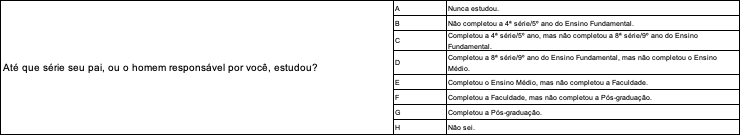

In [ ]:
quantiles = enem_sample_2018.groupby("Q001")[["NU_NOTA_MT"]].quantile([0.0, 0.25, 0.5, 0.75, 1.0]).reset_index()
quantiles = quantiles.rename({"level_1": "quantiles"}, axis=1)
quantiles["quantiles"] = quantiles["quantiles"].map("{:.2%}".format)
quantiles

,Q001,quantiles,NU_NOTA_MT
0,A,0.00%,0.000
1,A,25.00%,420.000
2,A,50.00%,461.900
3,A,75.00%,534.200
4,A,100.00%,707.900
5,B,0.00%,369.400
6,B,25.00%,435.725
7,B,50.00%,488.900
8,B,75.00%,546.825
9,B,100.00%,782.400


In [ ]:
fig = px.box(enem_sample_2018.sort_values(["Q001"]),
             y="NU_NOTA_MT",
             color="Q001", hover_data=["Q001"])
fig.show()

In [ ]:
fig = go.Figure()
boxplot_data = {"Q001":["Brasil"],
                "q1": [enem_sample_2018[["NU_NOTA_MT"]].quantile(0.25)[0]],
                "median": [enem_sample_2018[["NU_NOTA_MT"]].quantile(0.50)[0]],
                "q3": [enem_sample_2018[["NU_NOTA_MT"]].quantile(0.75)[0]],
                "lowerfence": [enem_sample_2018[["NU_NOTA_MT"]].min()[0]],
                "upperfence": [enem_sample_2018[["NU_NOTA_MT"]].max()[0]],
                }

for estado in quantiles.query("quantiles == '50.00%'").sort_values(["NU_NOTA_MT"])["Q001"]:
  mydata = enem_sample_2018.query(f"Q001 == '{estado}'")

  boxplot_data["Q001"].append(estado)
  boxplot_data["q1"].append(mydata[["NU_NOTA_MT"]].quantile(0.25)[0])
  boxplot_data["median"].append(mydata[["NU_NOTA_MT"]].quantile(0.50)[0])
  boxplot_data["q3"].append(mydata[["NU_NOTA_MT"]].quantile(0.75)[0])
  boxplot_data["lowerfence"].append(mydata[["NU_NOTA_MT"]].min()[0])
  boxplot_data["upperfence"].append(mydata[["NU_NOTA_MT"]].max()[0])

fig.add_trace(go.Box())
fig.update_traces(x=boxplot_data["Q001"],
                  q1=boxplot_data["q1"],
                  median=boxplot_data["median"],
                  q3=boxplot_data["q3"],
                  lowerfence=boxplot_data["lowerfence"],
                  upperfence=boxplot_data["upperfence"] )

fig.show()

## Exercício 4b
Faça a mesma análise, porém considerando escolaridade do pai. Indique quais casos possuem métricas superiores e inferiores do que as métricas nacionais.

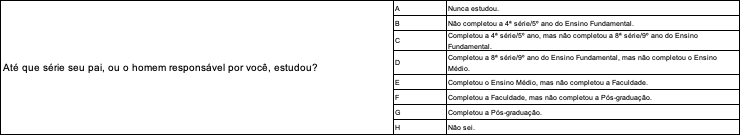

In [ ]:
enem_sample_2018.loc[enem_sample_2018['Q001'] == 'B', 'Q001'] = 'A'
enem_sample_2018.loc[enem_sample_2018['Q001'] == 'C', 'Q001'] = 'A'
enem_sample_2018.loc[enem_sample_2018['Q001'] == 'D', 'Q001'] = 'A'
enem_sample_2018.loc[enem_sample_2018['Q001'] == 'E', 'Q001'] = 'A'
enem_sample_2018.loc[enem_sample_2018['Q001'] == 'H', 'Q001'] = 'G'

In [ ]:
quantiles = enem_sample_2018.groupby("Q001")[["NU_NOTA_MT"]].quantile([0.0, 0.25, 0.5, 0.75, 1.0]).reset_index()
quantiles = quantiles.rename({"level_1": "quantiles"}, axis=1)
quantiles["quantiles"] = quantiles["quantiles"].map("{:.2%}".format)
quantiles

,Q001,quantiles,NU_NOTA_MT
0,A,0.00%,0.000
1,A,25.00%,449.525
2,A,50.00%,508.150
3,A,75.00%,582.900
4,A,100.00%,833.300
5,F,0.00%,373.100
6,F,25.00%,529.600
7,F,50.00%,620.400
8,F,75.00%,711.700
9,F,100.00%,935.600


In [ ]:
fig = px.box(enem_sample_2018.sort_values(["Q001"]),
             y="NU_NOTA_MT",
             color="Q001", hover_data=["Q001"])
fig.show()

In [ ]:
fig = go.Figure()
boxplot_data = {"Q001":["Brasil"],
                "q1": [enem_sample_2018[["NU_NOTA_MT"]].quantile(0.25)[0]],
                "median": [enem_sample_2018[["NU_NOTA_MT"]].quantile(0.50)[0]],
                "q3": [enem_sample_2018[["NU_NOTA_MT"]].quantile(0.75)[0]],
                "lowerfence": [enem_sample_2018[["NU_NOTA_MT"]].min()[0]],
                "upperfence": [enem_sample_2018[["NU_NOTA_MT"]].max()[0]],
                }

for estado in quantiles.query("quantiles == '50.00%'").sort_values(["NU_NOTA_MT"])["Q001"]:
  mydata = enem_sample_2018.query(f"Q001 == '{estado}'")

  boxplot_data["Q001"].append(estado)
  boxplot_data["q1"].append(mydata[["NU_NOTA_MT"]].quantile(0.25)[0])
  boxplot_data["median"].append(mydata[["NU_NOTA_MT"]].quantile(0.50)[0])
  boxplot_data["q3"].append(mydata[["NU_NOTA_MT"]].quantile(0.75)[0])
  boxplot_data["lowerfence"].append(mydata[["NU_NOTA_MT"]].min()[0])
  boxplot_data["upperfence"].append(mydata[["NU_NOTA_MT"]].max()[0])

fig.add_trace(go.Box())
fig.update_traces(x=boxplot_data["Q001"],
                  q1=boxplot_data["q1"],
                  median=boxplot_data["median"],
                  q3=boxplot_data["q3"],
                  lowerfence=boxplot_data["lowerfence"],
                  upperfence=boxplot_data["upperfence"] )

fig.show()